# Final Project

In [23]:
import pandas as pd
import ast
import networkx as nx
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

In [6]:
df_artists = pd.read_csv("./data/musicoset_metadata/artists.csv", sep=None)

C:\Users\danie\AppData\Local\Temp\ipykernel_24424\2699947190.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df_artists = pd.read_csv("./data/musicoset_metadata/artists.csv", sep=None)


In [7]:
df_artists

,artist_id,name,followers,popularity,artist_type,main_genre,genres,image_url
0,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,34554242.0,96,singer,dance pop,"['dance pop', 'pop', 'post-teen pop']",https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...
1,26VFTg2z8YR0cCuwLzESi2,Halsey,7368242.0,90,singer,dance pop,"['dance pop', 'electropop', 'etherpop', 'indie...",https://i.scdn.co/image/22a5f3d8c42bc7cb55215e...
2,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,6313709.0,94,rapper,pop,"['pop', 'pop rap', 'rap']",https://i.scdn.co/image/dc5eba5e032c2e5bc4d42c...
3,246dkjvS1zLTtiykXe5h60,Post Malone,16737002.0,96,rapper,dfw rap,"['dfw rap', 'pop', 'rap']",https://i.scdn.co/image/f9d8b742b66609f12da023...
4,1zNqQNIdeOUZHb8zbZRFMX,Swae Lee,483032.0,89,singer,trap music,['trap music'],https://i.scdn.co/image/a177469870b41f7e17e3b5...
...,...,...,...,...,...,...,...,...
11513,7vyRisgvM6Wm0Pnp0qXx6m,Sweeney Todd,634.0,19,-,classic canadian rock,['classic canadian rock'],https://i.scdn.co/image/47166b7afefd590ce85086...
11514,2Uh4UmiQhrrElbrvJVH0dT,Brooklyn Dreams,318.0,32,band,-,[],https://i.scdn.co/image/bae9c82929c50d2dadb1ec...
11515,1VGFS4UGLOAxlMGqzcqHG1,PMD,1405.0,32,-,-,[],https://i.scdn.co/image/926172541a4dff5dca6bce...
11516,3Se8xpgCBmfXVnZqRSRRH9,The Tribute Co.,274.0,21,-,-,[],https://i.scdn.co/image/d4e9b2299fc5cbe4332251...


In [12]:
df_songs = pd.read_csv(
    "./data/musicoset_metadata/songs.csv",
    sep=None,
    engine="python"
)

In [13]:
df_songs

,song_id,song_name,billboard,artists,popularity,explicit,song_type
0,3e9HZxeyfWwjeyPAMmWSSQ,"thank u, next","('Thank U, Next', 'Ariana Grande')",{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},86,True,Solo
1,5p7ujcrUXASCNwRaWNHR1C,Without Me,"('Without Me', 'Halsey')",{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},87,True,Solo
2,2xLMifQCjDGFmkHkpNLD9h,SICKO MODE,"('Sicko Mode', 'Travis Scott')",{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},85,True,Solo
3,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,('Sunflower (Spider-Man: Into The Spider-Verse...,"{'246dkjvS1zLTtiykXe5h60': 'Post Malone', '1zN...",92,False,Collaboration
4,1rqqCSm0Qe4I9rUvWncaom,High Hopes,"('High Hopes', 'Panic! At The Disco')",{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},86,False,Solo
...,...,...,...,...,...,...,...
20400,4NnhLA66RRLXxKbiiscU9R,How Can I Be Sure - Single Version,"('How Can I Be Sure', 'David Cassidy')",{'5X3TuTi9OIsJXMGxPwTKM2': 'The Young Rascals'},36,False,Solo
20401,2jHfXdCLibrI1J56LnUAZv,To Show I Love You - Mono,"('To Show I Love You', 'Peter And Gordon')",{'6lHC2EQMEMZiEmSfFloarn': 'Peter And Gordon'},1,False,Solo
20402,6zqsyB7uIvWrL1iCJzpNrs,You Better Run - Single Version,"('You Better Run', 'Pat Benatar')",{'5X3TuTi9OIsJXMGxPwTKM2': 'The Young Rascals'},20,False,Solo
20403,5mz9pQZZXNpAw9CdQ7Bk8q,Don't Pity Me - Mono,"('Don't Pity Me', 'Peter And Gordon')",{'6lHC2EQMEMZiEmSfFloarn': 'Peter And Gordon'},7,False,Solo


In [14]:
df_songs["artists_dict"] = df_songs["artists"].apply(ast.literal_eval)

In [15]:
df_songs[["song_name", "artists_dict", "song_type"]].head()

,song_name,artists_dict,song_type
0,"thank u, next",{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},Solo
1,Without Me,{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},Solo
2,SICKO MODE,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},Solo
3,Sunflower - Spider-Man: Into the Spider-Verse,"{'246dkjvS1zLTtiykXe5h60': 'Post Malone', '1zN...",Collaboration
4,High Hopes,{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},Solo


In [ ]:
edge_counter = Counter()
artist_names = {}
df_collab = df_songs[df_songs["song_type"] != "Solo"]
for _, row in df_collab.iterrows():
    artists = row["artists_dict"]
    artist_ids = list(artists.keys())

    # store names
    for aid, name in artists.items():
        artist_names[aid] = name

    # collaborations
    if len(artist_ids) > 1:
        for a, b in combinations(sorted(artist_ids), 2):
            edge_counter[(a, b)] += 1

# build graph
G = nx.Graph()

# add nodes
for aid, name in artist_names.items():
    G.add_node(aid, name=name)

# add weighted edges
for (a, b), w in edge_counter.items():
    G.add_edge(a, b, weight=w)

print("Artists:", G.number_of_nodes())
print("Collaborations:", G.number_of_edges())


Artists: 6025
Collaborations: 2186


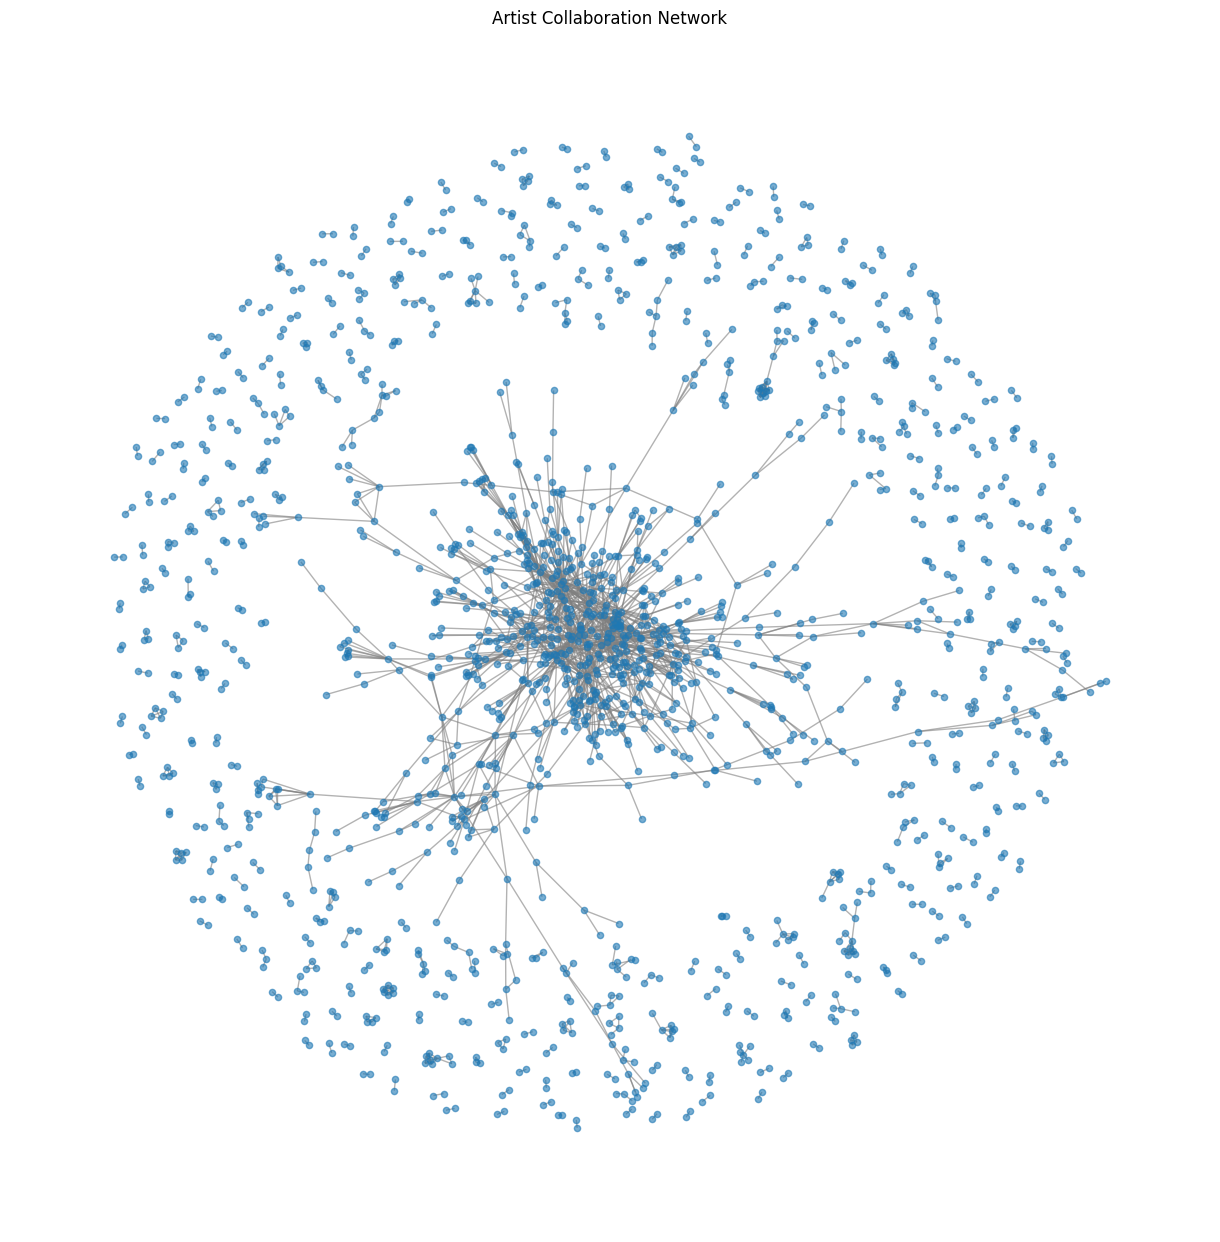

In [24]:
plt.figure(figsize=(12, 12))

pos = nx.spring_layout(G, seed=42, k=0.15)

nx.draw(
    G,
    pos,
    node_size=20,
    alpha=0.6,
    edge_color="gray",
    with_labels=False
)

plt.title("Artist Collaboration Network")
plt.show()